# Project template

## Create and activate a virtual environment:
A virtual environment in Python is an isolated workspace that allows you to manage dependencies for different projects independently.
Each virtual environment has its own Python interpreter and libraries, ensuring that changes in one environment don’t affect others.
This is crucial when working on multiple projects that require different versions of packages or Python itself.
By using virtual environments, you can avoid conflicts between dependencies and maintain clean, consistent project setups.
Tools like venv, virtualenv, and conda help create and manage these environments, making development more organized and predictable.

In [ ]:
# pls comment out or del what you don't need:)
# using venv: if not working try to replace ! by %
!python3.8 -m venv myenv  # Create a virtual environment with a specific Python version
!source myenv/bin/activate # Activate the virtual environment (use myenv\Scripts\activate on Windows)
!pip install -r requirements.txt # Install dependencies

# using conda:
!conda deactivate # if you have had a conda env activated
!conda create --name myenv python=3.8  # Create a conda env with a specific Python version
!conda activate myenv              # Activate environment
!pip install -r requirements.txt      # Install dependencies from requirements.txt


## Import your Libs:

In [2]:
# define the libs you want to use in our code
"""
xyz beeing the file that contains the functions we want to use in this project...
1) import xyz -> imports the library and the functions are accessible through dotindexing joblib -> example: joblib.load() loads a saved object 
2) import xyz as t -> imports the lib (same as 1)) but makes them accesible through dotindexing t
3) from xyz import a,b,c -> only the functions a,b and c are imported and can be directly called by a(), b() or c()
4) from xyz import * -> all functinos from the package/file xyz

If you want to import a package that is not installed yet -> use pip install xyz if pip is available for the package (check in documentation or just try)

"""
# openly avail. libs: 
import joblib # enables you to save and load objects directly from python ()
import numpy as np # all kind of basic math and DS operations
import pandas as pd # potencially most essencial library
import random # to provide you with random numbers and choices where you need them
import matplotlib.pyplot as plt # featurerich plotting library especially in combination with seaborn
import seaborn as sns # see plt
import statsmodels.formula.api as smf # statistics basics to advanced can be found here
from ydata_profiling import ProfileReport # creating a magnificent GUI (graphical user interface based) exporatory surface to look at the data.
import os # reating and writing to the machine
from pathlib import Path # working with pathes -> especially useful for different envs (mac, Windows, ...)

# define the paths
FEASIBILITY_PATH = str(Path(os.path.abspath('')).resolve())
BLENDED_ICU_PATH = str(Path(os.path.abspath('')).resolve().parents[0]) + "/BlendedICU"
%cd ../../BlendedICU # change you working directory to BlendedICU

# private packages, helpers:
from blended_preprocessing.timeseries import blendedicuTSP # in the folder blended_preprocessing there is a .py file that has some functions/class/other object we want to use


In [5]:
# Customize your display options for pandas and numpy
pd.set_option('display.max_rows', 100)  # Set max rows to display
pd.set_option('display.max_columns', 20)  # Set max columns to display
pd.set_option('display.width', 1000)  # Set the display width for the console
pd.set_option('display.float_format', '{:.2f}'.format)  # Set the float display format
np.set_printoptions(precision=3)

### some Functions:

In [7]:
# display number of cases before and after filtering todo @PHK: write as a decorator
def filter_stats(before, after):
    n_cases_before_filtering = before.shape[0]
    n_cases_after_filtering = after.shape[0]
    n_cases_excluded_by_filtering = n_cases_before_filtering - n_cases_after_filtering

    print(f"Number of cases before filtering:\t{n_cases_before_filtering:6.0f}")
    print(f"Number of cases after filtering:\t{n_cases_after_filtering:6.0f}")
    print(
        f"Number of cases excluded by filtering:\t{n_cases_excluded_by_filtering:6.0f}"
    )

In [6]:
# set a handle to the datasets -> so that these can be imported automatically...
class TSP(blendedicuTSP):
    def __init__(self):
        self.SEED = 0  # 42
        random.seed(self.SEED)

        self.savepath = "/data02/projects/reprodicubility/blended-files/blended_data/"
        self.formatted_ts_dir = f"{self.savepath}/formatted_timeseries"
        self.formatted_med_dir = f"{self.savepath}/formatted_medications"

        self.labels_pth = f"{self.savepath}/preprocessed_labels.parquet"
        self.flats_pth = f"{self.savepath}/preprocessed_flat.parquet"

        print("ts_pths")
        self.subset_ts_pths = self.get_ts_pths(self.formatted_ts_dir, sample=2000)
        self.all_ts_pths = self.get_ts_pths(self.formatted_ts_dir)
        print("med_pths")
        self.subset_med_pths = self.get_ts_pths(self.formatted_med_dir, sample=2000)
        self.all_med_pths = self.get_ts_pths(self.formatted_med_dir)
        # print("omop")
        # self.omop = OMOP_converter(ts_pths=self.subset_ts_pths, med_pths=self.subset_med_pths)
fs = TSP()

ts_pths
Loading /data02/projects/reprodicubility/blended-files/blended_data/preprocessed_labels.parquet
Saving /data02/projects/reprodicubility/blended-files/blended_data//formatted_timeseries/index.csv
Loading /data02/projects/reprodicubility/blended-files/blended_data/preprocessed_labels.parquet
Saving /data02/projects/reprodicubility/blended-files/blended_data//formatted_timeseries/index.csv
med_pths
Loading /data02/projects/reprodicubility/blended-files/blended_data/preprocessed_labels.parquet
Saving /data02/projects/reprodicubility/blended-files/blended_data//formatted_medications/index.csv
Loading /data02/projects/reprodicubility/blended-files/blended_data/preprocessed_labels.parquet
Saving /data02/projects/reprodicubility/blended-files/blended_data//formatted_medications/index.csv


## 0. Study design


### 0.1 Defining time of eligibility assessment => (1)

`-> t_eligibility = [icu_admission]`
- 1st ICU admission

### 0.2 Defining exposure period (for 2.1) => (2/3)

`-> t_0 = [intubation_first_dtime]`
- 48h continuous ventlation

### 0.3 Defining time of outcome evaluation (for 3.1) => (4)

`-> t_outcome = [mortality_in_hospital]`
- mortality

### 0.4 Defining time frame for standard confounders (ideally lying between (1) and (2/3))

`-> t_confounder_lower_bound = [t_0 - 24h]`

`-> t_confounder_upper_bound = [t_0]`

https://www.canva.com/design/DAGO45RLVr8/E0dV4XRvwyUz-asUE4qBOQ/edit?utm_content=DAGO45RLVr8&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton

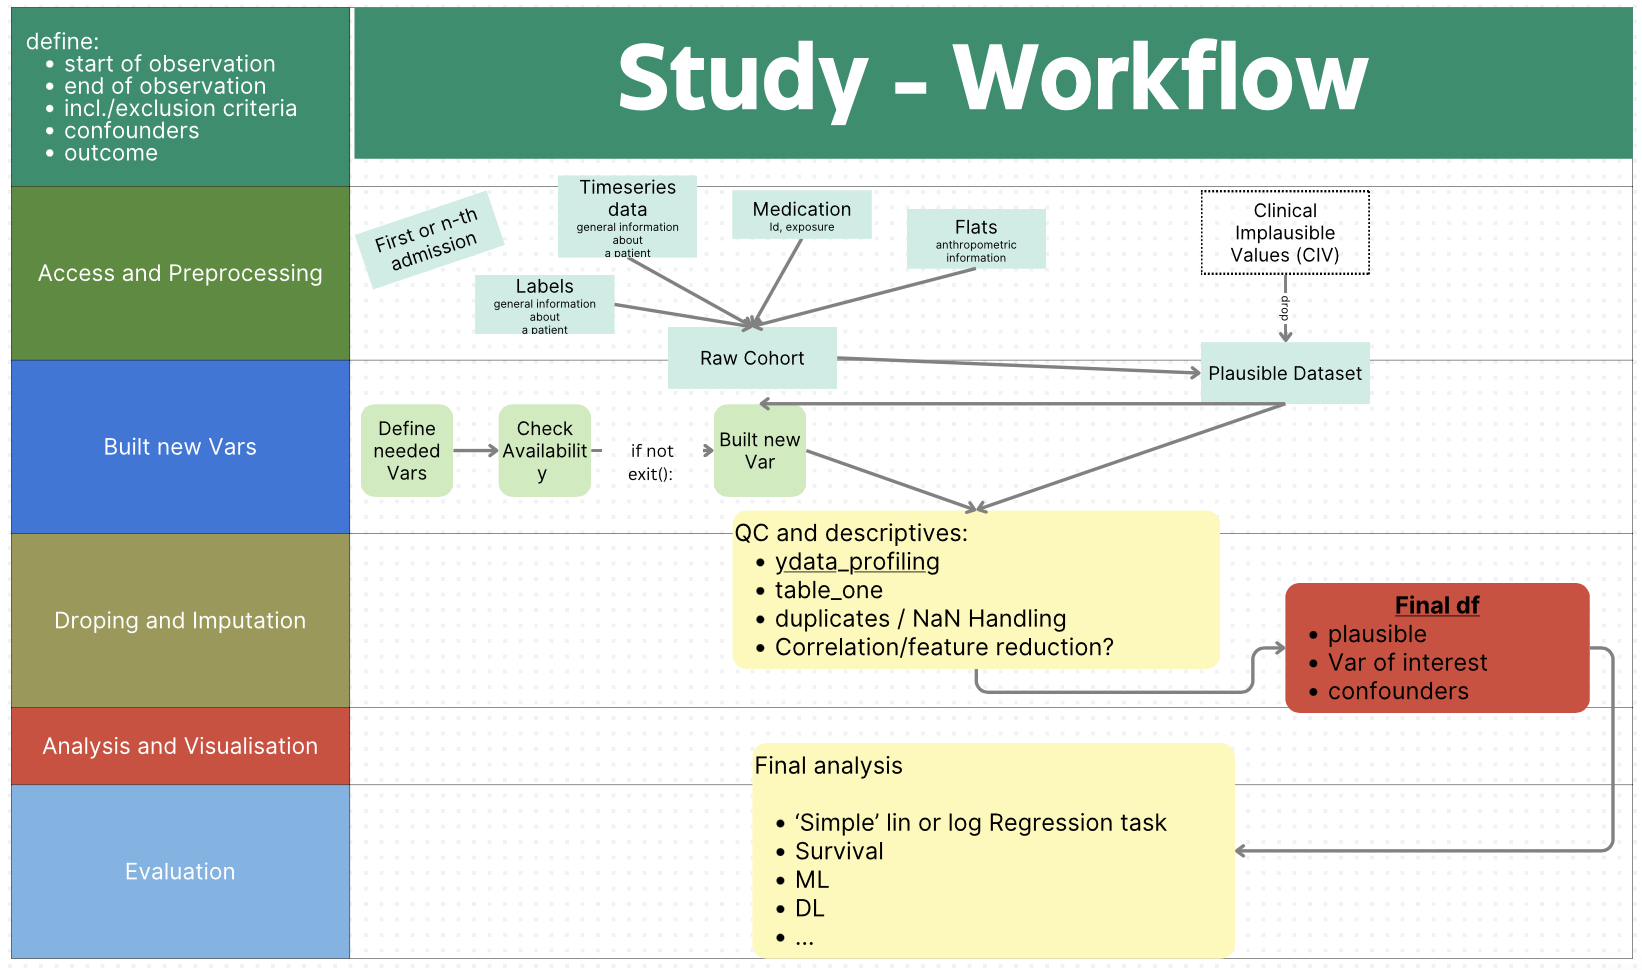

### 0.5 Defining clinically implausible values
adapted from [Data Cleaning for Clinically Impossible Values – ICU](https://docs.google.com/spreadsheets/d/1GDEz7k5AWbXNez652PPVq-bxys0OjTDbOPVQvdSfLAw/edit) by DvW

In [ ]:
clinically_implausible_values = pd.read_csv(
    f"{FEASIBILITY_PATH}/clinically_implausible_values.csv", sep=";", index_col=0
)
CIV = clinically_implausible_values  # for brevity
display(clinically_implausible_values)

## 1. Defining the primary study cohort

Here, all variables used to select patients of interest should be created (considering the time of eligibility assessment).

However, dropping patients of not interest for this study should be done below (## 5. Figure 1 / Study flow)

### 1.0 Defining data source(s) for inclusion/exclusion criteria

In [9]:
# import the labels and the flats
labels = pd.read_parquet(fs.labels_pth)
labels = labels.replace({"sex": {1: "Male", 0: "Female", 0.5: "Unknown/Other"}})

flats = pd.read_parquet(fs.flats_pth)
flats = flats.replace({"sex": {1: "Male", 0: "Female", 0.5: "Unknown/Other"}})

### 1.1 Defining time of eligibility

In [10]:
# get the indices of first ICU admission for each patient
labels_first_icu_admission_indices = (
    labels.reset_index()
    .groupby(["source_dataset", "original_uniquepid"])
    .first()["patient"]
) #cleaner would be sort?
print(f"Total number of cases: {labels_first_icu_admission_indices.shape[0]}\n")

# # filter the 'labels' DataFrame to keep only the first ICU admission of each patient
labels_first_icu_admission = labels[
    labels.index.isin(labels_first_icu_admission_indices)
]

# check if patient IDs are all unique per dataset
for dataset in labels.source_dataset.unique():
    print(
        f"Dataset: {dataset}\n"
        f"Unique patient IDs: {labels_first_icu_admission[labels_first_icu_admission.source_dataset == dataset].original_uniquepid.nunique()}\n"
        f"Filtered patient IDs: {labels_first_icu_admission[labels_first_icu_admission.source_dataset == dataset].shape[0]}\n"
    )

Total number of cases: 268880

Dataset: eicu
Unique patient IDs: 138813
Filtered patient IDs: 138813

Dataset: hirid
Unique patient IDs: 33626
Filtered patient IDs: 33626

Dataset: mimic3
Unique patient IDs: 45521
Filtered patient IDs: 45521

Dataset: mimic4
Unique patient IDs: 50920
Filtered patient IDs: 50920



In [11]:
filter_stats(labels, labels_first_icu_admission)#

Number of cases before filtering:	362298
Number of cases after filtering:	268880
Number of cases excluded by filtering:	 93418


### 1.2 Cleaning raw data for clinically implausible values

In [12]:
flats_clinically_plausible = flats[
    (flats.age >= CIV.loc["age", "min"])
    & (flats.age <= CIV.loc["age", "max"])
    & (flats.height >= CIV.loc["height", "min"])
    & (flats.height <= CIV.loc["height", "max"])
    & (flats.weight >= CIV.loc["weight", "min"])
    & (flats.weight <= CIV.loc["weight", "max"])
]

### 1.3 Quality check
<div class="alert alert-block alert-info"> Focus on availability of data &rarr; e.g., systematic pattern missingness as well as frequencies! </div>

In [13]:
# interactively explore the data
profile = ProfileReport(flats_clinically_plausible, title="Profiling Report")
profile.to_notebook_iframe()

### 1.4 Aggregation of variable

#### 1.4.I.1 Age >= 16

In [14]:
flats_age16plus = flats_clinically_plausible[flats_clinically_plausible.age >= 16]
labels_first_icu_admission_age16plus = labels_first_icu_admission[
    labels_first_icu_admission.index.isin(flats_age16plus.index)
]

In [15]:
current_flats = flats_age16plus.copy()
current_labels = labels_first_icu_admission_age16plus.copy()
filter_stats(labels_first_icu_admission, labels_first_icu_admission_age16plus)

Number of cases before filtering:	268880
Number of cases after filtering:	190238
Number of cases excluded by filtering:	 78642


#### 1.4.I.2 Duration of Invasive Ventilation >= consecutive 48h

In [16]:
def get_vent_duration_in_s(ts):
    
    minRR = clinically_implausible_values.loc["RR", "min"]

    if len(ts[ts.respiratory_rate_setting >= minRR].time) == 0:
        return 0

    start = ts[ts.respiratory_rate_setting >= 0].time.iloc[0]
    # ended = ts[ts.respiratory_rate_setting >= 0].time.iloc[-1]
    ended = (
        ts.time.max()
        if len(ts[ts.respiratory_rate_setting < minRR].time) == 0
        else ts[ts.respiratory_rate_setting < minRR].time.iloc[-1]
    )
    return ended - start


def get_vent_duration_in_h(ts):
    return get_vent_duration_in_s(ts) / 3600

In [17]:
ts_pths = fs.all_ts_pths[fs.all_ts_pths.index.isin(current_labels.index)]

In [18]:
# pre-select only patients with a length of stay of at least 48 hours
# to reduce the number of patients to be processed
ts_pths_48h = ts_pths[
    ts_pths.index.isin(current_labels[current_labels.lengthofstay >= 2].index)
]

In [19]:
# create dataframe with patient ID and ventilation duration
# for loop parallelized with joblib
# duration: ~30min

# check if file exists, otherwise generate
if os.path.exists(
    "/data02/projects/reprodicubility/projects/feasibility1/vent_durations.parquet"
):
    vent_durations_df = pd.read_parquet(
        "/data02/projects/reprodicubility/projects/feasibility1/vent_durations.parquet"
    )
    display(vent_durations_df.head())
else:
    vent_durations = joblib.Parallel(n_jobs=8)(
        joblib.delayed(get_vent_duration_in_h)(pd.read_parquet(pth))
        for pth in ts_pths_48h.ts_pth
    )

    # create dataframe with patient ID and ventilation duration
    vent_durations_df = pd.DataFrame(
        {"vent_duration_h": vent_durations}, index=ts_pths_48h.index
    )
    display(vent_durations_df.head())

    # export the 'vent_durations_df' DataFrame to a Parquet file
    vent_durations_df.to_parquet(
        f"/data02/projects/reprodicubility/projects/feasibility1/vent_durations.parquet"
    )

,vent_duration_h
patient,
eicu-1685060,126.97
eicu-395345,0.00
eicu-486575,0.00
eicu-1058311,0.00
eicu-3006128,25.20


In [20]:
# filter the 'labels' DataFrame to keep only patients with ventilation duration of at least 48 hours (2 days)
labels_first_icu_admission_age16plus_48hplus = labels_first_icu_admission_age16plus[
    labels_first_icu_admission_age16plus.index.isin(
        vent_durations_df[vent_durations_df.vent_duration_h >= 48].index
    )
]

In [21]:
current_labels = labels_first_icu_admission_age16plus_48hplus.copy()
current_flats = flats_age16plus[flats_age16plus.index.isin(current_labels.index)].copy()
filter_stats(labels_first_icu_admission, labels_first_icu_admission_age16plus)

Number of cases before filtering:	268880
Number of cases after filtering:	190238
Number of cases excluded by filtering:	 78642


In [22]:
labels_inclusion = current_labels
flats_inclusion = current_flats

#### 1.4.E.1 eICU-specific: patients from hospital which had fewer than 10 patients admitted in total

In [23]:
hospitals_with_less_than_10_patients = (
    (labels_inclusion.care_site.value_counts())
    .loc[labels_inclusion.care_site.value_counts() < 10]
    .index.to_list()
)
labels_inclusion_criteria_10plusPatients = labels_inclusion[
    ~labels_inclusion.care_site.isin(hospitals_with_less_than_10_patients)
]

In [24]:
current_labels = labels_inclusion_criteria_10plusPatients.copy()
current_flats = current_flats[current_flats.index.isin(current_labels.index)].copy()
current_ts_pths = ts_pths[ts_pths.index.isin(current_labels.index)]
filter_stats(
    labels_first_icu_admission_age16plus_48hplus,
    labels_inclusion_criteria_10plusPatients,
)

Number of cases before filtering:	 31832
Number of cases after filtering:	 31702
Number of cases excluded by filtering:	   130


### 1.5 Push aggregated variable to wide format DF for analyses
<div class="alert alert-block alert-info"> Proceed working only with patients fulfilling inclusion criteria for efficiency. </div>

In [25]:
current_labels.source_dataset.value_counts()

source_dataset
eicu      15901
mimic4     9077
hirid      5603
mimic3     1121
Name: count, dtype: int64

In [26]:
primary_study_cohort_labels = current_labels
primary_study_cohort_flats = current_flats
primary_study_cohort_ts_pths = current_ts_pths
primary_study_cohort_med_pths = fs.all_med_pths[
    fs.all_med_pths.index.isin(primary_study_cohort_labels.index)
]

## 2. Defining the primary exposure

### 2.0 Defining data source(s) for exposure definitions
Mean between the highest and the lowest mechanical power (MP) during the second 24h of mechanical ventilation. MP is calculated using tidal volume (VT), peak pressure (Ppeak), respiratory rate RR, and driving pressure (DP) data:
$$MP (\text{J/minutes}) = 0.098 \times V_T (\text{in Liters}) \times RR \times (P_{peak} - 1/2 \times DP)$$

In [27]:
def MP(VT, RR, PPlat, Ppeak, PEEP):
    VTliters = VT / 1000
    DP = PPlat - PEEP
    return 0.098 * VTliters * RR * (Ppeak - (0.5 * DP))

In [28]:
def kgPBW(height, sex):
    # assert unique values of sex are subset of ["Female", "Male"]
    # assert set(sex) <= set(["Female", "Male"]), "Invalid value for sex"

    factor = np.where(sex == "Male", 50, 45.5)
    return factor + 0.91 * (height - 152.4)

### 2.1 Defining "time 0" and exposure period

In [29]:
# get the indices of the first and last time points of the second 24 hours of invasive ventilation
def get_24h_indices(ts):
    if len(ts[ts.respiratory_rate_setting >= 0].time) == 0:
        return None, None

    start = ts[ts.respiratory_rate_setting >= 0].time.iloc[0]
    start += 24 * 3600
    end = start + 24 * 3600
    return start, end

In [30]:
# get the lowest and highest mechanical power during the second 24 hours of invasive ventilation
# during the second 24 hours of invasive ventilation
def get_24h_stats(ts):
    start, end = get_24h_indices(ts)
    if start is None or end is None:
        return None, None, None, None, None, None, None, None, None, None

    ts["time_diff"] = ts.time.diff()
    ts_24h = ts.ffill()[(ts.time >= start) & (ts.time < end)]

    # mechanical power
    ts_24h["mechanical_power"] = MP(
        ts_24h.tidal_volume_setting,
        ts_24h.respiratory_rate,
        ts_24h.plateau_pressure,
        ts_24h.peak_insp_pressure,
        ts_24h.PEEP,
    )
    lowest_mp = ts_24h.mechanical_power.min()
    highest_mp = ts_24h.mechanical_power.max()
    mean_mp = (lowest_mp + highest_mp) / 2

    # # time-weighted parameters
    # twmean_tidal_volume = np.average(ts_24h.tidal_volume_setting, weights=ts_24h.time_diff)
    # twmean_respiratory_rate = np.average(ts_24h.respiratory_rate, weights=ts_24h.time_diff)
    # twmean_plateau_pressure = np.average(ts_24h.plateau_pressure, weights=ts_24h.time_diff)
    # twmean_peak_insp_pressure = np.average(ts_24h.peak_insp_pressure, weights=ts_24h.time_diff)
    # twmean_peep = np.average(ts_24h.PEEP, weights=ts_24h.time_diff)
    # twmean_driving_pressure = np.average(
    #     ts_24h.plateau_pressure - ts_24h.PEEP, weights=ts_24h.time_diff
    # )

    # highest and lowest values
    lowest_tidal_volume = ts_24h.tidal_volume_setting.min()
    highest_tidal_volume = ts_24h.tidal_volume_setting.max()
    mean_tidal_volume = (lowest_tidal_volume + highest_tidal_volume) / 2

    lowest_respiratory_rate = ts_24h.respiratory_rate.min()
    highest_respiratory_rate = ts_24h.respiratory_rate.max()
    mean_respiratory_rate = (lowest_respiratory_rate + highest_respiratory_rate) / 2

    lowest_plateau_pressure = ts_24h.plateau_pressure.min()
    highest_plateau_pressure = ts_24h.plateau_pressure.max()
    mean_plateau_pressure = (lowest_plateau_pressure + highest_plateau_pressure) / 2

    lowest_peak_insp_pressure = ts_24h.peak_insp_pressure.min()
    highest_peak_insp_pressure = ts_24h.peak_insp_pressure.max()
    mean_peak_insp_pressure = (
        lowest_peak_insp_pressure + highest_peak_insp_pressure
    ) / 2

    lowest_peep = ts_24h.PEEP.min()
    highest_peep = ts_24h.PEEP.max()
    mean_peep = (lowest_peep + highest_peep) / 2

    lowest_driving_pressure = (ts_24h.plateau_pressure - ts_24h.PEEP).min()
    highest_driving_pressure = (ts_24h.plateau_pressure - ts_24h.PEEP).max()
    mean_driving_pressure = (lowest_driving_pressure + highest_driving_pressure) / 2

    return (
        lowest_mp,
        highest_mp,
        # twmean_tidal_volume,
        # twmean_respiratory_rate,
        # twmean_plateau_pressure,
        # twmean_peak_insp_pressure,
        # twmean_peep,
        # twmean_driving_pressure,
        lowest_tidal_volume,
        highest_tidal_volume,
        lowest_respiratory_rate,
        highest_respiratory_rate,
        lowest_plateau_pressure,
        highest_plateau_pressure,
        lowest_peak_insp_pressure,
        highest_peak_insp_pressure,
        lowest_peep,
        highest_peep,
        lowest_driving_pressure,
        highest_driving_pressure,
        mean_mp,
        mean_tidal_volume,
        mean_respiratory_rate,
        mean_plateau_pressure,
        mean_peak_insp_pressure,
        mean_peep,
        mean_driving_pressure,
    )

In [31]:
# create a DataFrame with the lowest and highest tidal volume, respiratory rate, plateau pressure, and PEEP
# during the second 24 hours of invasive ventilation for each patient
# for loop parallelized with joblib

# check if file exists, otherwise generate
if os.path.exists(
    "/data02/projects/reprodicubility/projects/feasibility1/24h_stats.parquet"
):
    stats_24h_df = pd.read_parquet(
        "/data02/projects/reprodicubility/projects/feasibility1/24h_stats.parquet"
    )
    display(stats_24h_df.head())
else:
    stats_24h = joblib.Parallel(n_jobs=8)(
        joblib.delayed(get_24h_stats)(pd.read_parquet(pth))
        for pth in primary_study_cohort_ts_pths.ts_pth
    )

    # create a DataFrame with the lowest and highest tidal volume, respiratory rate, plateau pressure, and PEEP
    # during the second 24 hours of invasive ventilation for each patient
    stats_24h_df = pd.DataFrame(
        stats_24h,
        columns=[
            "lowest_mp",
            "highest_mp",
            # "twmean_tidal_volume",
            # "twmean_respiratory_rate",
            # "twmean_plateau_pressure",
            # "twmean_peak_insp_pressure",
            # "twmean_peep",
            # "twmean_driving_pressure",
            "lowest_tidal_volume",
            "highest_tidal_volume",
            "lowest_respiratory_rate",
            "highest_respiratory_rate",
            "lowest_plateau_pressure",
            "highest_plateau_pressure",
            "lowest_peak_insp_pressure",
            "highest_peak_insp_pressure",
            "lowest_peep",
            "highest_peep",
            "lowest_driving_pressure",
            "highest_driving_pressure",
            "mean_mp",
            "mean_tidal_volume",
            "mean_respiratory_rate",
            "mean_plateau_pressure",
            "mean_peak_insp_pressure",
            "mean_peep",
            "mean_driving_pressure",
        ],
        index=primary_study_cohort_ts_pths.index,
    )
    display(stats_24h_df.head())

    # export the 'stats_24h_df' DataFrame to a Parquet file
    stats_24h_df.to_parquet(
        "/data02/projects/reprodicubility/projects/feasibility1/24h_stats.parquet"
    )

,lowest_mp,highest_mp,lowest_tidal_volume,highest_tidal_volume,lowest_respiratory_rate,highest_respiratory_rate,lowest_plateau_pressure,highest_plateau_pressure,lowest_peak_insp_pressure,highest_peak_insp_pressure,...,highest_peep,lowest_driving_pressure,highest_driving_pressure,mean_mp,mean_tidal_volume,mean_respiratory_rate,mean_plateau_pressure,mean_peak_insp_pressure,mean_peep,mean_driving_pressure
patient,,,,,,,,,,,,,,,,,,,,,
eicu-1685060,11.45,21.60,500.00,580.00,17.00,21.00,24.00,24.00,22.00,28.00,...,8.00,16.00,16.50,16.53,540.00,19.00,24.00,25.00,7.75,16.25
eicu-688753,3.97,38.73,500.00,500.00,9.00,51.00,11.00,24.00,12.00,25.00,...,5.00,6.00,19.00,21.35,500.00,30.00,17.50,18.50,5.00,12.50
eicu-265482,NaN,NaN,450.00,450.00,14.00,28.00,NaN,NaN,15.00,21.00,...,5.00,NaN,NaN,NaN,450.00,21.00,NaN,18.00,5.00,NaN
eicu-3227200,-1.03,14.61,450.00,450.00,0.00,23.00,13.00,16.00,4.00,23.00,...,5.00,8.00,11.00,6.79,450.00,11.50,14.50,13.50,5.00,9.50
eicu-762987,4.87,8.62,450.00,450.00,13.00,23.00,18.00,18.00,15.00,15.00,...,5.00,13.00,13.00,6.75,450.00,18.00,18.00,15.00,5.00,13.00


In [32]:
# subselect stats_24h_df
stats_24h_df = stats_24h_df[stats_24h_df.index.isin(primary_study_cohort_labels.index)]

In [33]:
stats_24h_df["kgPBW"] = kgPBW(
    primary_study_cohort_flats.loc[stats_24h_df.index, "height"],
    primary_study_cohort_flats.loc[stats_24h_df.index, "sex"].to_list(),
)
stats_24h_df["mean_tidal_volume_per_kgPBW"] = (
    stats_24h_df.mean_tidal_volume / stats_24h_df.kgPBW
)

### 2.2 Cleaning raw data for clinically implausible values

In [34]:
stats_24h_clinically_plausible = stats_24h_df[
    (stats_24h_df.lowest_tidal_volume >= CIV.loc["Vt", "min"])
    & (stats_24h_df.highest_tidal_volume <= CIV.loc["Vt", "max"])
    & (stats_24h_df.lowest_respiratory_rate >= CIV.loc["RR", "min"])
    & (stats_24h_df.highest_respiratory_rate <= CIV.loc["RR", "max"])
    & (stats_24h_df.lowest_plateau_pressure >= CIV.loc["Pplat", "min"])
    & (stats_24h_df.highest_plateau_pressure <= CIV.loc["Pplat", "max"])
    & (stats_24h_df.lowest_peak_insp_pressure >= CIV.loc["PIP", "min"])
    & (stats_24h_df.highest_peak_insp_pressure <= CIV.loc["PIP", "max"])
    & (stats_24h_df.lowest_peep >= CIV.loc["PEEP", "min"])
    & (stats_24h_df.highest_peep <= CIV.loc["PEEP", "max"])
    & (stats_24h_df.lowest_driving_pressure >= CIV.loc["DP", "min"])
    & (stats_24h_df.highest_driving_pressure <= CIV.loc["DP", "max"])
    & (stats_24h_df.lowest_mp >= CIV.loc["MP", "min"])
    & (stats_24h_df.highest_mp <= CIV.loc["MP", "max"])
]

In [35]:
filter_stats(stats_24h_df, stats_24h_clinically_plausible)

Number of cases before filtering:	 31702
Number of cases after filtering:	 13902
Number of cases excluded by filtering:	 17800


In [36]:
stats_24h_clinically_plausible = stats_24h_clinically_plausible.join(
    primary_study_cohort_labels["source_dataset"]
)
stats_24h_clinically_plausible.source_dataset.value_counts()

source_dataset
mimic4    6686
eicu      4326
hirid     2043
mimic3     847
Name: count, dtype: int64

### 2.3 Quality check
<div class="alert alert-block alert-info"> Focus on availability of data &rarr; e.g., systematic pattern missingness as well as frequencies! </div>

**Characteristics of mechanical ventilation in included patients**
- Mechanical power (J/min)
- Tidal volume (ml/kg PBW)
- PEEP (cmH2O)
- Plateau pressure (cmH2O)
- Driving pressure (cmH2O)
- Total respiratory rate (bpm)
- Minute ventilation (l/min)
- FiO2 (%)

In [37]:
characteristic_columns = [
    "mean_mp",
    "mean_tidal_volume_per_kgPBW",
    "mean_peep",
    "mean_plateau_pressure",
    "mean_driving_pressure",
    "mean_respiratory_rate",
]


def characteristic_stats(stats, groupby_column, caption=None):
    assert all(
        [col in stats.columns for col in characteristic_columns]
    ), "Invalid column name(s)"
    assert (
        groupby_column in stats.columns
    ), "Invalid column name (source_dataset missing)"

    characteristic_column_names = [
        "Mechanical power (J/min)",
        "Tidal volume per kg PBW (mL/kg)",
        "PEEP (cmH2O)",
        "Plateau pressure (cmH2O)",
        "Driving pressure (cmH2O)",
        "Total respiratory rate (bpm)",
    ]

    # group the 'stats_24h_df_clinically_plausible' DataFrame by the 'source_dataset' column
    medians = stats.groupby(groupby_column)[characteristic_columns].median().T

    quartiles = (
        stats.groupby(groupby_column)[characteristic_columns].quantile([0.25, 0.75]).T
    )

    # create table with medians and quartiles
    # string = median (Q1 - Q3)
    table = pd.DataFrame(index=medians.index, columns=medians.columns)
    for col in medians.columns:
        table[col] = (
            medians[col].round(2).astype(str)
            + " ("
            + quartiles[col, 0.25].round(2).astype(str)
            + " - "
            + quartiles[col, 0.75].round(2).astype(str)
            + ")"
        )
    table.index = characteristic_column_names

    table.loc["Case Counts"] = stats[groupby_column].value_counts()

    display(
        table.style.set_table_attributes("style='display:inline'").set_caption(caption)
    )


characteristic_stats(
    stats_24h_clinically_plausible, "source_dataset", "Second day of ventilation"
)

source_dataset,eicu,hirid,mimic3,mimic4
Mechanical power (J/min),14.31 (10.34 - 19.28),11.32 (8.33 - 17.1),10.75 (5.51 - 17.16),10.32 (6.24 - 15.5)
Tidal volume per kg PBW (mL/kg),7.89 (7.04 - 8.74),8.13 (7.42 - 8.94),8.4 (7.77 - 9.29),7.42 (6.72 - 8.31)
PEEP (cmH2O),5.0 (5.0 - 6.5),5.0 (5.0 - 6.0),5.0 (5.0 - 5.0),5.0 (5.0 - 6.5)
Plateau pressure (cmH2O),18.5 (16.0 - 22.0),20.4 (16.4 - 24.32),19.0 (16.0 - 22.0),18.0 (15.0 - 21.0)
Driving pressure (cmH2O),12.5 (10.0 - 15.5),14.75 (11.15 - 18.1),13.0 (11.0 - 16.0),12.0 (10.0 - 14.0)
Total respiratory rate (bpm),20.0 (17.5 - 23.0),20.1 (17.55 - 22.67),19.5 (17.5 - 22.0),20.0 (17.5 - 22.5)
Case Counts,4326,2043,847,6686


### 2.4 Aggregation of final primary exposure variable

In [38]:
# missing values
stats_24h_clinically_plausible.isnull().groupby(
    primary_study_cohort_labels["source_dataset"]
).sum()

,lowest_mp,highest_mp,lowest_tidal_volume,highest_tidal_volume,lowest_respiratory_rate,highest_respiratory_rate,lowest_plateau_pressure,highest_plateau_pressure,lowest_peak_insp_pressure,highest_peak_insp_pressure,...,mean_mp,mean_tidal_volume,mean_respiratory_rate,mean_plateau_pressure,mean_peak_insp_pressure,mean_peep,mean_driving_pressure,kgPBW,mean_tidal_volume_per_kgPBW,source_dataset
source_dataset,,,,,,,,,,,,,,,,,,,,,
eicu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hirid,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mimic3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mimic4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
stats_24h_clean = stats_24h_clinically_plausible.copy().dropna(
    subset=stats_24h_clinically_plausible.columns.difference(
        ["mean_tidal_volume_per_kgPBW", "kgPBW"]
    )
)

In [40]:
exposure_cohort_stats = stats_24h_clean
exposure_cohort_labels = primary_study_cohort_labels[
    primary_study_cohort_labels.index.isin(exposure_cohort_stats.index)
]
exposure_cohort_flats = primary_study_cohort_flats[
    primary_study_cohort_flats.index.isin(exposure_cohort_stats.index)
]
exposure_cohort_ts_pths = primary_study_cohort_ts_pths[
    primary_study_cohort_ts_pths.index.isin(exposure_cohort_stats.index)
]
exposure_cohort_med_pths = primary_study_cohort_med_pths[
    primary_study_cohort_med_pths.index.isin(exposure_cohort_stats.index)
]

### 2.5 Push aggregated variable to wide format DF for analyses

## 3. Defining the primary outcome

### 3.0 Defining data source(s) for outcome definitions

In [41]:
outcome = exposure_cohort_labels["mortality"]

### 3.1 Time of outcome evaluation 

### 3.2 Cleaning raw data for clinically implausible values

### 3.3 Quality check
<div class="alert alert-block alert-info"> Focus on availability of data &rarr; e.g., systematic pattern missingness as well as frequencies! </div>

### 3.4 Aggregation of final primary outcome variable

### 3.5 Push aggregated outcome variable to wide format DF for analyses

In [42]:
outcome_cohort = pd.DataFrame(outcome).join(
    exposure_cohort_stats.drop(columns="source_dataset")
)
outcome_cohort = outcome_cohort.join(exposure_cohort_flats)
outcome_cohort = outcome_cohort.join(
    exposure_cohort_labels[["origin", "unit_type", "true_lengthofstay"]]
)

In [43]:
outcome_cohort_labels = exposure_cohort_labels[
    exposure_cohort_labels.index.isin(outcome_cohort.index)
]
outcome_cohort_flats = exposure_cohort_flats[
    exposure_cohort_flats.index.isin(outcome_cohort.index)
]
outcome_cohort_ts_pths = exposure_cohort_ts_pths[
    exposure_cohort_ts_pths.index.isin(outcome_cohort.index)
]
outcome_cohort_med_pths = exposure_cohort_med_pths[
    exposure_cohort_med_pths.index.isin(outcome_cohort.index)
]

## 4. Defining key descriptives and confounding variables for the primary analysis
**For each variable, the following criteria need to be defined:**

### 4.1 Data source(s)

In [44]:
covariates = outcome_cohort[
    [
        *exposure_cohort_flats.columns,
        *characteristic_columns[1:],
        "origin",
        "unit_type",
        "true_lengthofstay",
    ]
]

In [45]:
covariates

,age,sex,height,weight,from_US,source_dataset,mean_tidal_volume_per_kgPBW,mean_peep,mean_plateau_pressure,mean_driving_pressure,mean_respiratory_rate,origin,unit_type,true_lengthofstay
patient,,,,,,,,,,,,,,
eicu-1055453,69.00,Male,172.70,61.36,1,eicu,5.47,5.00,14.00,9.00,17.00,Emergency,Medical,3.01
eicu-1055561,40.00,Male,182.80,88.40,1,eicu,6.15,5.00,16.50,11.50,23.00,Emergency,Medical,11.49
eicu-1056213,73.00,Male,182.80,88.10,1,eicu,6.83,6.50,15.50,8.50,27.50,Other,Medical,16.33
eicu-1057116,59.00,Male,170.00,82.00,1,eicu,8.13,5.00,13.50,8.50,18.00,Emergency,Medical,24.13
eicu-1057294,76.00,Female,165.00,113.00,1,eicu,8.78,5.00,14.00,9.00,18.00,Emergency,Medical,14.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mimic4-39989733,80.00,Male,172.86,80.86,0,mimic4,9.36,5.00,22.00,17.00,17.00,Other,Cardiac,4.05
mimic4-39995213,45.00,Female,161.96,78.86,0,mimic4,6.27,11.00,23.50,12.50,23.00,Operating Room,Medical,6.13
mimic4-39996123,91.00,Female,157.24,80.52,0,mimic4,10.02,5.00,20.00,15.00,22.00,Emergency,Medical-Surgical,3.58


#### 4.1.1 additional covariates

In [46]:
# get the lowest and highest mechanical power during the second 24 hours of invasive ventilation
# during the second 24 hours of invasive ventilation
def get_24h_covariates(ts):
    start, end = get_24h_indices(ts)

    ts["time_diff"] = ts.time.diff()
    ts_24h = ts.ffill()[(ts.time >= start) & (ts.time < end)]

    # highest and lowest values
    lowest_hr = ts_24h.heart_rate.min()
    highest_hr = ts_24h.heart_rate.max()
    mean_hr = (lowest_hr + highest_hr) / 2

    lowest_map = ts_24h.noninvasive_mean_blood_pressure.min()
    highest_map = ts_24h.noninvasive_mean_blood_pressure.max()
    mean_map = (lowest_map + highest_map) / 2

    lowest_spo2 = ts_24h.O2_pulseoxymetry_saturation.min()
    highest_spo2 = ts_24h.O2_pulseoxymetry_saturation.max()
    mean_spo2 = (lowest_spo2 + highest_spo2) / 2

    lowest_temp = ts_24h.temperature.min()
    highest_temp = ts_24h.temperature.max()
    mean_temp = (lowest_temp + highest_temp) / 2

    lowest_pH = ts_24h.pH.min()
    highest_pH = ts_24h.pH.max()
    mean_pH = (lowest_pH + highest_pH) / 2

    lowest_paO2 = ts_24h.paO2.min()
    highest_paO2 = ts_24h.paO2.max()
    mean_paO2 = (lowest_paO2 + highest_paO2) / 2

    lowest_FiO2 = ts_24h.FiO2.min()
    highest_FiO2 = ts_24h.FiO2.max()
    mean_FiO2 = (lowest_FiO2 + highest_FiO2) / 2

    lowest_pfratio = (ts_24h.paO2 / ts_24h.FiO2).min()
    highest_pfratio = (ts_24h.paO2 / ts_24h.FiO2).max()
    mean_pfratio = (lowest_pfratio + highest_pfratio) / 2

    lowest_paCO2 = ts_24h.paCO2.min()
    highest_paCO2 = ts_24h.paCO2.max()
    mean_paCO2 = (lowest_paCO2 + highest_paCO2) / 2

    return (
        lowest_hr,
        highest_hr,
        lowest_map,
        highest_map,
        lowest_spo2,
        highest_spo2,
        lowest_temp,
        highest_temp,
        lowest_pH,
        highest_pH,
        lowest_paO2,
        highest_paO2,
        lowest_FiO2,
        highest_FiO2,
        lowest_pfratio,
        highest_pfratio,
        lowest_paCO2,
        highest_paCO2,
        mean_hr,
        mean_map,
        mean_spo2,
        mean_temp,
        mean_pH,
        mean_paO2,
        mean_FiO2,
        mean_pfratio,
        mean_paCO2,
    )


# create a DataFrame with the lowest and highest heart rate, mean arterial pressure,
# SpO2, temperature, pH, PaO2/FiO2, and paCO2
# during the second 24 hours of invasive ventilation for each patient
# for loop parallelized with joblib

# check if file exists, otherwise generate
if os.path.exists(
    "/data02/projects/reprodicubility/projects/feasibility1/24h_covariates.parquet"
):
    covariates_24h_df = pd.read_parquet(
        "/data02/projects/reprodicubility/projects/feasibility1/24h_covariates.parquet"
    )
    display(covariates_24h_df.head())
else:
    covariates_24h = joblib.Parallel(n_jobs=8)(
        joblib.delayed(get_24h_covariates)(pd.read_parquet(pth))
        for pth in outcome_cohort_ts_pths.ts_pth
    )

    # create a DataFrame with the lowest and highest heart rate, mean arterial pressure,
    # SpO2, temperature, pH, PaO2/FiO2, and paCO2
    # during the second 24 hours of invasive ventilation for each patient
    covariates_24h_df = pd.DataFrame(
        covariates_24h,
        columns=[
            "lowest_hr",
            "highest_hr",
            "lowest_map",
            "highest_map",
            "lowest_spo2",
            "highest_spo2",
            "lowest_temp",
            "highest_temp",
            "lowest_pH",
            "highest_pH",
            "lowest_paO2",
            "highest_paO2",
            "lowest_FiO2",
            "highest_FiO2",
            "lowest_pfratio",
            "highest_pfratio",
            "lowest_paCO2",
            "highest_paCO2",
            "mean_hr",
            "mean_map",
            "mean_spo2",
            "mean_temp",
            "mean_pH",
            "mean_paO2",
            "mean_FiO2",
            "mean_pfratio",
            "mean_paCO2",
        ],
        index=outcome_cohort_ts_pths.index,
    )
    display(covariates_24h_df.head())

    # export the 'covariates_24h_df' DataFrame to a Parquet file
    covariates_24h_df.to_parquet(
        "/data02/projects/reprodicubility/projects/feasibility1/24h_covariates.parquet"
    )

,lowest_hr,highest_hr,lowest_map,highest_map,lowest_spo2,highest_spo2,lowest_temp,highest_temp,lowest_pH,highest_pH,...,highest_paCO2,mean_hr,mean_map,mean_spo2,mean_temp,mean_pH,mean_paO2,mean_FiO2,mean_pfratio,mean_paCO2
patient,,,,,,,,,,,,,,,,,,,,,
eicu-1685060,51.00,88.00,57.00,77.00,97.70,98.80,NaN,NaN,7.36,7.41,...,37.60,69.50,67.00,98.25,NaN,7.39,122.50,45.00,2.78,35.90
eicu-762987,88.00,130.00,65.00,120.00,98.00,98.00,NaN,NaN,7.38,7.38,...,40.00,109.00,92.50,98.00,NaN,7.38,104.00,3.00,34.67,40.00
eicu-3064947,69.00,103.00,42.00,72.00,97.00,97.00,NaN,NaN,7.40,7.40,...,23.00,86.00,57.00,97.00,NaN,7.40,85.00,24.00,3.15,23.00
eicu-2481803,61.00,85.00,43.00,88.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,73.00,65.50,NaN,NaN,NaN,NaN,65.00,NaN,NaN
eicu-2318900,107.00,125.00,62.00,101.00,97.00,97.00,NaN,NaN,7.38,7.39,...,35.00,116.00,81.50,97.00,NaN,7.39,227.00,45.00,4.54,33.50


### 4.2 Period of interest (e.g., `X`h pre `T0` OR `X`h post admission)
<div class="alert alert-block alert-warning"> Here it's important to specify, whether any prior/baseline or based on upper & lower bound of <code>t_confounder</code> should be applied! </div>

### 4.3 Cleaning raw data for clinically implausible values

In [47]:
covariates_clinically_plausible = covariates_24h_df[
    (covariates_24h_df.lowest_pH >= CIV.loc["pH", "min"])
    & (covariates_24h_df.highest_pH <= CIV.loc["pH", "max"])
    & (covariates_24h_df.lowest_paO2 >= CIV.loc["paO2", "min"])
    & (covariates_24h_df.highest_paO2 <= CIV.loc["paO2", "max"])
    & (covariates_24h_df.lowest_FiO2 >= CIV.loc["FiO2", "min"])
    & (covariates_24h_df.highest_FiO2 <= CIV.loc["FiO2", "max"])
]

### 4.4 Quality check
<div class="alert alert-block alert-info"> Focus on availability of data &rarr; e.g., systematic pattern missingness as well as frequencies! </div>

In [48]:
filter_stats(covariates_24h_df, covariates_clinically_plausible)

Number of cases before filtering:	 17935
Number of cases after filtering:	 16246
Number of cases excluded by filtering:	  1689


### 4.5 Choose aggregation method and aggregate variable

In [49]:
covariates_clean = covariates[
    covariates.index.isin(covariates_clinically_plausible.index)
]
covariates_clean = covariates_clean.join(covariates_clinically_plausible)

In [50]:
outcome_cohort = outcome_cohort.join(covariates_clinically_plausible)

### 4.6 Push aggregated variable to wide format DF for analyses

## 5. Select study cohort and create Figure 1 / study flow
<div class="alert alert-block alert-warning"> Carefully assess whether systematic missingness for required variables leads to exclusion of certain patients and may potentially introduce bias! </div>

In [51]:
study_cohort_covariates = covariates_clean.copy()

In [52]:
study_cohort = outcome_cohort[outcome_cohort.index.isin(study_cohort_covariates.index)]
study_cohort_labels = outcome_cohort_labels[
    outcome_cohort_labels.index.isin(study_cohort_covariates.index)
]
study_cohort_flats = outcome_cohort_flats[
    outcome_cohort_flats.index.isin(study_cohort_covariates.index)
]
study_cohort_ts_pths = outcome_cohort_ts_pths[
    outcome_cohort_ts_pths.index.isin(study_cohort_covariates.index)
]
study_cohort_med_pths = outcome_cohort_med_pths[
    outcome_cohort_med_pths.index.isin(study_cohort_covariates.index)
]

In [53]:
filter_stats(labels, study_cohort_labels)

Number of cases before filtering:	362298
Number of cases after filtering:	 12592
Number of cases excluded by filtering:	349706


## 6. Quality check of study cohort

### Create Data Quality Report based on Y-data profile

Assess the following aspects:

6.1 Alerts highlighted by the report

6.2 Overall cohort size and feasibility, especially focusing on systematic patterns of missigness across years / ICUs / centers

6.3 Descriptives for all aggregated variables

6.4 Expected interactions and correlation of variables for sanity checks

6.5 Patterns of missingness

6.6 Select a sample of `X` observations for front-end double check by clinican (for relevant variables of primary)   

In [54]:
# profile = ProfileReport(study_cohort, title="Profiling Report")
# #profile.to_notebook_iframe()

## 7. Create Table 1 across exposure (or outcome) levels and assess carefully with clinicans 
<div class="alert alert-block alert-info"> Use package, enable `stddiff` in addition to p-values for comparisons! </div>

In [55]:
characteristic_stats(study_cohort, "mortality", "Mortality")

mortality,0,1
Mechanical power (J/min),11.32 (7.24 - 16.44),14.91 (10.23 - 20.57)
Tidal volume per kg PBW (mL/kg),7.8 (7.02 - 8.73),7.37 (6.68 - 8.21)
PEEP (cmH2O),5.0 (5.0 - 6.0),5.0 (5.0 - 9.0)
Plateau pressure (cmH2O),18.0 (15.5 - 21.95),20.0 (16.5 - 24.0)
Driving pressure (cmH2O),12.5 (10.0 - 15.3),13.0 (10.5 - 15.55)
Total respiratory rate (bpm),20.0 (17.5 - 22.5),20.5 (18.0 - 23.5)
Case Counts,10531,2061


## 8. Primary analysis

Simply perform.

In [56]:
study_cohort.to_csv(
    "/data02/projects/reprodicubility/projects/feasibility1/study_cohort.csv",
    index=False,
)

### 8.1 MP vs Mortality

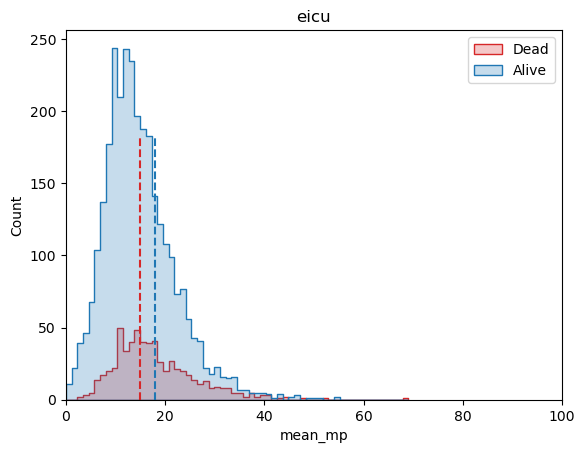

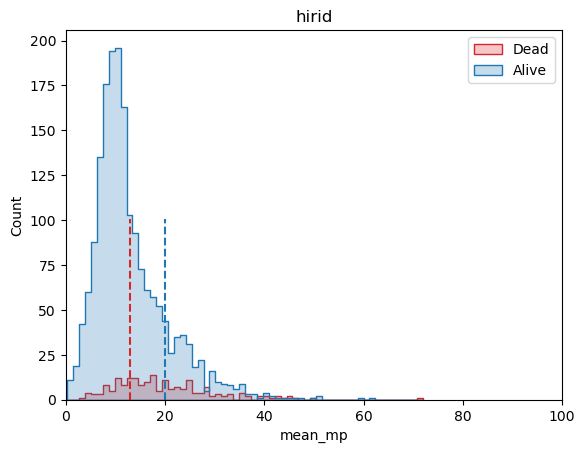

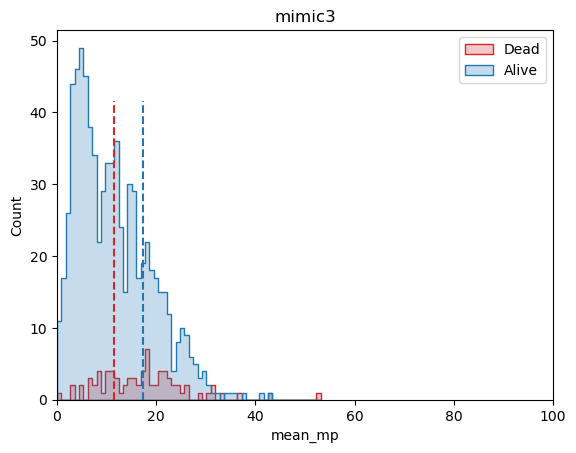

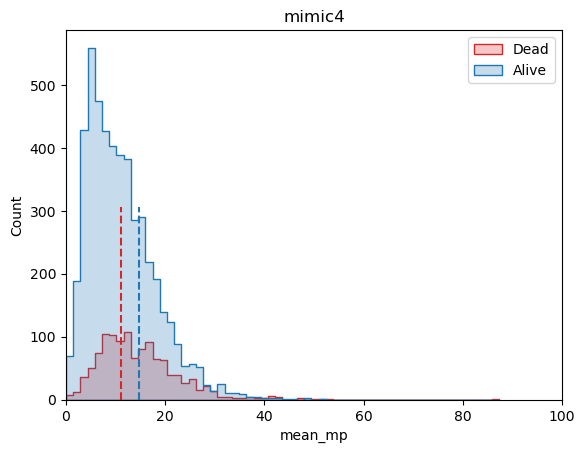

In [57]:
# plot the distribution of the 'mean MP' values for patients with different outcomes for each dataset
for dataset in study_cohort.source_dataset.unique():
    sns.histplot(
        data=study_cohort[study_cohort.source_dataset == dataset],
        x="mean_mp",
        hue="mortality",
        bins=60,
        palette={0: "tab:blue", 1: "tab:red"},
        element="step",
    )
    plt.vlines(
        study_cohort[study_cohort.source_dataset == dataset]
        .groupby("mortality")["mean_mp"]
        .mean(),
        0,
        len(study_cohort[study_cohort.source_dataset == dataset]) / 20,
        color=("tab:red", "tab:blue"),
        linestyle="--",
    )
    plt.xlim(CIV.loc["MP", "min"], CIV.loc["MP", "max"])
    plt.legend(["Dead", "Alive"])
    plt.title(dataset)
    plt.show()

### 8.2 Simple Logistic Regression

In [58]:
res = smf.logit(
    # "mortality ~ age + sex + height + weight + origin + unit_type",
    "mortality ~ mean_mp + age + sex + height + weight",
    data=study_cohort,
).fit(maxiter=100, method="bfgs")
res.summary()

Optimization terminated successfully.
         Current function value: 0.422053
         Iterations: 70
         Function evaluations: 78
         Gradient evaluations: 78


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              mortality   No. Observations:                12592
Model:                          Logit   Df Residuals:                    12585
Method:                           MLE   Df Model:                            6
Date:                 Mo, 19 Aug 2024   Pseudo R-squ.:                 0.05309
Time:                        20:16:53   Log-Likelihood:                -5314.5
converged:                       True   LL-Null:                       -5612.4
Covariance Type:            nonrobust   LLR p-value:                1.788e-125
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -2.2945      0.524     -4.381      0.000      -3.321      -1.268
sex[T.Male]             -0.0975      0.066     -1.476      0.140      -0.227       0.032
sex[T.Unknown/Other]   -16.2715   7703.289     -0.002      0.998   -1.51e+04    1.51e+04
mean_mp                  0.0688      0.003     21.912      0.000       0.063       0.075
age                      0.0189      0.002     11.169      0.000       0.016       0.022
height                  -0.0056      0.003     -1.768      0.077      -0.012       0.001
weight                  -0.0066      0.001     -5.391      0.000      -0.009      -0.004
========================================================================================
"""

In [59]:
params = res.params
conf = pd.DataFrame(res.conf_int())
conf["Odds Ratio"] = np.exp(params)
conf=np.exp(conf)
conf.columns = ["5%", "95%", "Odds Ratio"]
# conf.index = ["const", "mean_mp", "age", "sex", "height", "weight"]

                       5%  95%  Odds Ratio
Intercept            0.04 0.28        0.10
sex[T.Male]          0.80 1.03        0.91
sex[T.Unknown/Other] 0.00  inf        0.00
mean_mp              1.06 1.08        1.07
age                  1.02 1.02        1.02
height               0.99 1.00        0.99
weight               0.99 1.00        0.99


/data01/home/fifa10/.conda/envs/reprodicubility/lib/python3.10/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)


## 9. - N. additional analyses

Create additional variables needed for these analyses, if not already present.

Perform each analysis in separate box.